# Test Notebook to play with and learn the API

In [8]:
import os
from datetime import datetime

fabric_refresh_token = None
%store -r fabric_refresh_token
if fabric_refresh_token is None:
    fabric_refresh_token=os.environ['CILOGON_REFRESH_TOKEN']
    %store fabric_refresh_token
    
print("Refresh Token: {}".format(fabric_refresh_token))
now = datetime.now()
print("Refresh Token Issued at {}".format(now))
print(os.environ['CILOGON_REFRESH_TOKEN'])

Refresh Token: NB2HI4DTHIXS6Y3JNRXWO33OFZXXEZZPN5QXK5DIGIXTIYLDGA4DMNJYMMZWIMJYMI3TSNTBGI3DOMZQGIYDSYTBMRSDAYZ7OR4XAZJ5OJSWM4TFONUFI33LMVXCM5DTHUYTMMRSHA4TMMZTGA2DQNJGOZSXE43JN5XD25RSFYYCM3DJMZSXI2LNMU6TQNRUGAYDAMBQ
Refresh Token Issued at 2021-06-05 13:17:50.334367
NB2HI4DTHIXS6Y3JNRXWO33OFZXXEZZPN5QXK5DIGIXTKNDCGE4DCNDGMY4GMOBVMNRGMMDGMZSDQYRQGFQWIZLEHFSDQMZ7OR4XAZJ5OJSWM4TFONUFI33LMVXCM5DTHUYTMMRSHAZDQMZXGMZTINZGOZSXE43JN5XD25RSFYYCM3DJMZSXI2LNMU6TQNRUGAYDAMBQ


In [9]:
import os
import json

from fabrictestbed.slice_manager import SliceManager, Status

credmgr_host = os.environ['FABRIC_CREDMGR_HOST']
orchestrator_host = os.environ['FABRIC_ORCHESTRATOR_HOST']
print(f"CM Host: {credmgr_host} Orchestrator Host: {orchestrator_host}")
      
# Create Slice Manager
slice_manager = SliceManager(oc_host=orchestrator_host, cm_host=credmgr_host, 
                             refresh_token=fabric_refresh_token, project_name='all', scope='all')

#Configure SSH Key
ssh_key = None
with open ("/home/fabric/.ssh/id_rsa.pub", "r") as myfile:
    ssh_key=myfile.read().strip()
    
#print(ssh_key)

CM Host: beta-2.fabric-testbed.net Orchestrator Host: beta-7.fabric-testbed.net


In [10]:
try:
    id_token, refresh_token = slice_manager.refresh_tokens()
except Exception as e:
    print("Exception occured while getting tokens:{}".format(e))
    
fabric_refresh_token=slice_manager.get_refresh_token()
fabric_id_token=slice_manager.get_id_token()

print()
print("New Refresh Token: {}".format(fabric_refresh_token))
print("New ID Token: {}".format(fabric_id_token))
print()
print("Stored new Refresh Token")
%store fabric_refresh_token
print()



New Refresh Token: NB2HI4DTHIXS6Y3JNRXWO33OFZXXEZZPN5QXK5DIGIXTMZLEME4GIODFMI2GMNLGGU4TOM3BMI4TINZRGQ2TSMTFGE4TKZR7OR4XAZJ5OJSWM4TFONUFI33LMVXCM5DTHUYTMMRSHA4TSMBXGI3TGMBGOZSXE43JN5XD25RSFYYCM3DJMZSXI2LNMU6TQNRUGAYDAMBQ
New ID Token: eyJ0eXAiOiJKV1QiLCJhbGciOiJSUzI1NiIsImtpZCI6ImI0MTUxNjcyMTExOTFlMmUwNWIyMmI1NGIxZDNiNzY2N2U3NjRhNzQ3NzIyMTg1ZTcyMmU1MmUxNDZmZTQzYWEifQ.eyJlbWFpbCI6ImxvY2tlakBidS5lZHUiLCJjZXJ0X3N1YmplY3RfZG4iOiIvREM9b3JnL0RDPWNpbG9nb24vQz1VUy9PPUJvc3RvbiBVbml2ZXJzaXR5L0NOPUpvc2VwaCBSeWFuIExvY2tlIEI0NjEzMTg5NyIsImlkcCI6Imh0dHBzOi8vc2hpYi5idS5lZHUvaWRwL3NoaWJib2xldGgiLCJpZHBfbmFtZSI6IkJvc3RvbiBVbml2ZXJzaXR5IiwiZXBwbiI6ImxvY2tlakBidS5lZHUiLCJlcHRpZCI6Imh0dHBzOi8vc2hpYi5idS5lZHUvaWRwL3NoaWJib2xldGghaHR0cHM6Ly9jaWxvZ29uLm9yZy9zaGliYm9sZXRoITh0QSszdTRNYitoMGNMbEV0a1JIVXNUOHBYQT0iLCJhZmZpbGlhdGlvbiI6InN0dWRlbnRAYnUuZWR1O21lbWJlckBidS5lZHUiLCJuYW1lIjoiSm9zZXBoIFJ5YW4gTG9ja2UiLCJhY3IiOiJodHRwczovL3NoaWIuYnUuZWR1L3NpbmdsZSIsImVudGl0bGVtZW50IjoiaHR0cDovL2lhbS5idS5lZHUvcmVnL2NvbGxlZ2

In [13]:
status, advertised_topology = slice_manager.resources()

print(f"Status: {status}")
print(f"Topology: {advertised_topology}")
#advertised_topology.draw()

Status: Status.OK
Topology: RENC: { cpu: 6/6, core: 92/96, ram: 1472/1536G, disk: 109100/109600G, unit: 3/3, }
	Components:
		NVME-P4510:  NVME P4510 { disk: 10000/10000G, unit: 10/10, }
		GPU-RTX6000:  GPU RTX6000 { unit: 2/2, }
		GPU-Tesla T4:  GPU Tesla T4 { unit: 4/4, }
		SharedNIC-ConnectX-6:  SharedNIC ConnectX-6 { unit: 3/3, }
		SmartNIC-ConnectX-6:  SmartNIC ConnectX-6 { unit: 2/2, }
		SmartNIC-ConnectX-5:  SmartNIC ConnectX-5 { unit: 1/2, }
	Site Interfaces:
UKY: { cpu: 6/6, core: 92/96, ram: 1472/1536G, disk: 109100/109600G, unit: 3/3, }
	Components:
		GPU-RTX6000:  GPU RTX6000 { unit: 2/2, }
		GPU-Tesla T4:  GPU Tesla T4 { unit: 3/4, }
		SharedNIC-ConnectX-6:  SharedNIC ConnectX-6 { unit: 3/3, }
		SmartNIC-ConnectX-6:  SmartNIC ConnectX-6 { unit: 2/2, }
		SmartNIC-ConnectX-5:  SmartNIC ConnectX-5 { unit: 2/2, }
		NVME-P4510:  NVME P4510 { disk: 10000/10000G, unit: 10/10, }
	Site Interfaces:
LBNL: { cpu: 6/6, core: 88/96, ram: 1440/1536G, disk: 108900/109600G, unit: 3/3, }
	C

### Slice Request

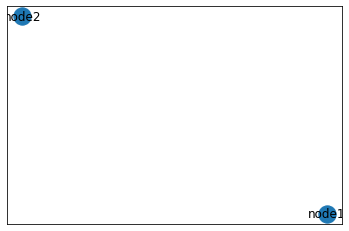

In [15]:
from fabrictestbed.slice_editor import ExperimentTopology, Capacities, ComponentType, LinkType, Layer

experiment = ExperimentTopology()

slice_name="JacksTestSlice2"

node1 = experiment.add_node(name='node1', site='RENC')

node1_capacity = Capacities()
node1_capacity.set_fields(core=2, ram=32, disk=256)
node1.set_properties(capacities=node1_capacity, image_type='qcow2', image_ref='default_ubuntu_20')

node1_nvme = node1.add_component(ctype=ComponentType.NVME, model='P4510', name='n1_nvme')
node1_gpu = node1.add_component(ctype=ComponentType.GPU, model='RTX6000', name='n1_gpu')
node1_nic = node1.add_component(ctype=ComponentType.SharedNIC, model='ConnectX-6', name='n1_nic')

node2 = experiment.add_node(name='node2', site='LBNL')

node2_capacity = Capacities()
node2_capacity.set_fields(core=2, ram=16, disk=256)
node2.set_properties(capacities=node2_capacity, image_type='qcow2', image_ref='default_ubuntu_20')

#node2_nvme = node2.add_component(ctype=ComponentType.NVME, model='P4510', name='n2_nvme')
node2_gpu = node2.add_component(ctype=ComponentType.GPU, model='Tesla T4', name='n2_gpu')
node2_nic1 = node2.add_component(ctype=ComponentType.SharedNIC, model='ConnectX-6', name='n2_nic1')
node2_nic2 = node2.add_component(ctype=ComponentType.SharedNIC, model='ConnectX-6', name='n2_nic2')

experiment.draw()

In [22]:
slice_graph = experiment.serialize()

status, reservations = slice_manager.create(slice_name=slice_name, slice_graph=slice_graph, ssh_key=ssh_key)
#print(status)
#print(reservations)
print("Request {}".format(status))
slice_id=reservations[0].slice_id

print("Reservations: {}".format(reservations))
print("Slice ID: {}".format(slice_id))

Request Status.OK
Reservations: [{
    "graph_node_id": "bf858948-f1ea-47e3-911f-00d0c2358c9a",
    "join_state": "None_",
    "lease_end": "2021-06-06 13:21:37",
    "reservation_id": "b94d2c4f-7a52-480d-adc4-e66f835055ca",
    "reservation_state": "Unknown",
    "resource_type": "VM",
    "slice_id": "890d90d1-59af-490b-8049-b0c4049c0fa8"
}, {
    "graph_node_id": "c289fe7d-33e7-4cfe-9f57-8e7c0fefb2e4",
    "join_state": "None_",
    "lease_end": "2021-06-06 13:21:37",
    "reservation_id": "5e4f1b86-e6b1-4330-9449-53d786b12729",
    "reservation_state": "Unknown",
    "resource_type": "VM",
    "slice_id": "890d90d1-59af-490b-8049-b0c4049c0fa8"
}]
Slice ID: 890d90d1-59af-490b-8049-b0c4049c0fa8


In [25]:
status, slices = slice_manager.slices()

print("Response Status {}".format(status))
print("Slices {}".format(slices))

Response Status Status.OK
Slices []


In [24]:
import time

slice_state=None
while slice_state != 'StableOK':
    status, slice_status = slice_manager.slice_status(slice_id=slice_id)
    slice_state = slice_status.slice_state
    print("Response Status {}".format(status))
    print("Slice State: {}".format(slice_state)) # updated slice[0].slice_state to just slice_state
    time.sleep(20)
    
print("Response Status {}".format(status))
print("Slice Status {}".format(slice_status))

Response Status Status.OK
Slice State: Closing


KeyboardInterrupt: 

In [26]:
status, slivers = slice_manager.slivers(slice_id=slice_id)

print("Response Status {}".format(status))
print("Slivers {}".format(reservations))

Response Status Status.OK
Slivers [{
    "graph_node_id": "bf858948-f1ea-47e3-911f-00d0c2358c9a",
    "join_state": "None_",
    "lease_end": "2021-06-06 13:21:37",
    "reservation_id": "b94d2c4f-7a52-480d-adc4-e66f835055ca",
    "reservation_state": "Unknown",
    "resource_type": "VM",
    "slice_id": "890d90d1-59af-490b-8049-b0c4049c0fa8"
}, {
    "graph_node_id": "c289fe7d-33e7-4cfe-9f57-8e7c0fefb2e4",
    "join_state": "None_",
    "lease_end": "2021-06-06 13:21:37",
    "reservation_id": "5e4f1b86-e6b1-4330-9449-53d786b12729",
    "reservation_state": "Unknown",
    "resource_type": "VM",
    "slice_id": "890d90d1-59af-490b-8049-b0c4049c0fa8"
}]


In [27]:
script= '#!/bin/bash  \n' \
        'lspci  \n'

In [28]:
import paramiko 
#from scp import SCPClient, SCPException

key = paramiko.RSAKey.from_private_key_file("/home/fabric/.ssh/id_rsa")
client = paramiko.SSHClient()
client.load_system_host_keys()
client.set_missing_host_key_policy(paramiko.MissingHostKeyPolicy())

client.set_missing_host_key_policy(paramiko.AutoAddPolicy())

for sliver in slivers:
    node_name = sliver.name
    management_ip = sliver.management_ip
    
    print("Node {0} IP {1}".format(node_name, management_ip))
    
    client.connect(management_ip,username='ubuntu',pkey = key)

    stdin, stdout, stderr = client.exec_command('echo \"' + script + '\" > script.sh; chmod +x script.sh; sudo ./script.sh')
    print ('')
    print (str(stdout.read(),'utf-8').replace('\\n','\n'))

    client.close()

Node node1 IP None


NoValidConnectionsError: [Errno None] Unable to connect to port 22 on 127.0.0.1 or ::1

In [29]:
status, result = slice_manager.delete(slice_id=slice_id)

print("Response Status {}".format(status))
print("Response received {}".format(result))

Response Status Status.FAILURE
Response received (400)
Reason: BAD REQUEST
HTTP response headers: HTTPHeaderDict({'Server': 'nginx/1.19.8', 'Date': 'Sat, 05 Jun 2021 13:23:36 GMT', 'Content-Type': 'application/json', 'Content-Length': '61', 'Connection': 'keep-alive'})
HTTP response body: "Slice# 890d90d1-59af-490b-8049-b0c4049c0fa8 already closed"


